# Linear Regresion with Normal equation

In [1]:
# %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [38]:
X = df.values
y = boston.target

In [16]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
X_train.size

4407

In [23]:
X_test.size

2171

In [24]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [25]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [26]:
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse

4.552364598463056

In [27]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.724023437339703

Text(0.5, 1.0, 'Prices vs Predicted prices:$Y_i$ vs $\\hat{Y}_i$')

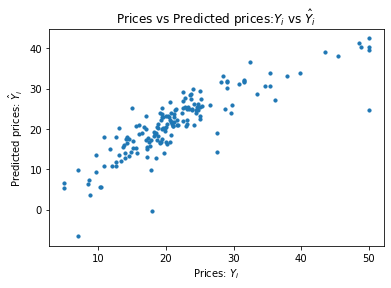

In [30]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices:$Y_i$ vs $\hat{Y}_i$")

In [31]:
lr_ne.intercept_

33.3349757556361

In [32]:
lr_ne.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

# Linear Regression with SGD

In [34]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

Scaling 한 결과

In [39]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [56]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [57]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [58]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse, mse

(4.612172031280015, 21.27213084612162)

Text(0.5, 1.0, 'Prices vs Predicted prices:$Y_i$ vs $\\hat{Y}_i$')

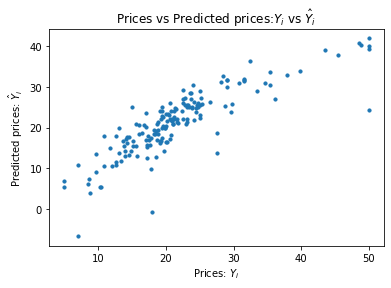

In [59]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices:$Y_i$ vs $\hat{Y}_i$")

Scaling 하지 않은 결과

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [42]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [43]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse, mse

(237943269390983.12, 5.661699944846997e+28)

Text(0.5, 1.0, 'Prices vs Predicted prices:$Y_i$ vs $\\hat{Y}_i$')

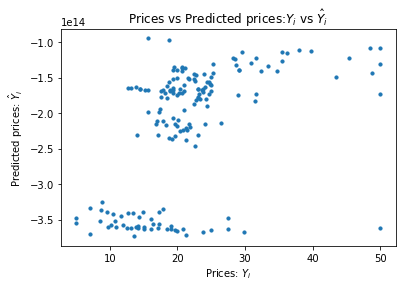

In [44]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices:$Y_i$ vs $\hat{Y}_i$")

# Linear Regression with Ridge & Lasso regression

In [45]:
from sklearn.linear_model import Lasso, Ridge

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [49]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true) ** 2).sum() / len(y_true)))
rmse, mse

(4.579058484791169, 20.967776607137996)

Text(0.5, 1.0, 'Prices vs Predicted prices:$Y_i$ vs $\\hat{Y}_i$')

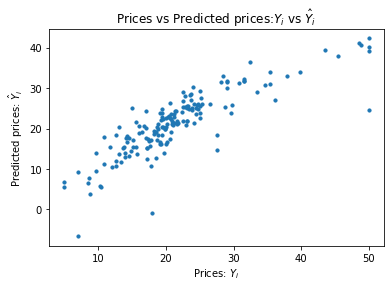

In [50]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices:$Y_i$ vs $\hat{Y}_i$")